## Natural Language Processing
## Sentimental Analysis with Amazon Product Reviews by Customers

#### The GOAL of these project is to VIEW and CLASSIFY some KEYWORDS in the customer review of a paricular product.
 
#### Therefore an analysis will be performed on these KEYWORDS to know if it falls under... 
#### (1) Positive review (2) Negative review (3) Neutral review

In [1]:
#Importing relevant libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string

This is a CSV dataset that consist of the review of each customer on various amazon products...

In [2]:
df = pd . read_csv('AM_product_review.csv')

In [3]:
df.head() # Read first 5 rows

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [4]:
df.shape #The data also consist of "143377" Rows and "4" columns

(14337, 4)

In [5]:
df.info() # The data also consist of only one numerical column...which is the review star of each product

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ReviewTitle  14337 non-null  object
 1   ReviewBody   14337 non-null  object
 2   ReviewStar   14337 non-null  int64 
 3   Product      14337 non-null  object
dtypes: int64(1), object(3)
memory usage: 448.2+ KB


In [6]:
df.isna().sum() # Checking if missing values is present in the data.

ReviewTitle    0
ReviewBody     0
ReviewStar     0
Product        0
dtype: int64

In [7]:
df.ReviewStar.value_counts() # Checking the count of the unique value in the "Review Star" column.

5    6213
4    3189
1    2493
3    1503
2     939
Name: ReviewStar, dtype: int64

In [8]:
df.Product.value_counts() # Checking the unique value in the "Product" column.

boAt Rockerz 255         5000
Sennheiser CX 6.0BT      5000
JBL T110BT               1922
JBL T205BT               1411
PTron Intunes             254
Skullcandy S2PGHW-174     239
Samsung EO-BG950CBEIN     224
Flybot Wave               182
Flybot Boom                82
Flybot Beat                23
Name: Product, dtype: int64

##### Droping the "Review Title" column in the dataSet and perform the analysis on the "Review Body" column...

In [9]:
#Slicing our dataFrame to exclude the Review Title column
df = df[['Product','ReviewBody','ReviewStar']]

In [10]:
df.head()
# Verifying if the dataFrame is correctly sliced

,Product,ReviewBody,ReviewStar
0,boAt Rockerz 255,No doubt it has a great bass and to a great ex...,3
1,boAt Rockerz 255,"This earphones are unreliable, i bought it be...",1
2,boAt Rockerz 255,"i bought itfor 999,I purchased it second time,...",4
3,boAt Rockerz 255,Its sound quality is adorable. overall it was ...,1
4,boAt Rockerz 255,Its Awesome... Good sound quality & 8-9 hrs ba...,5


##### Overwriting the entries in the "Product Review" column...this is going to be achieved through
##### python dictionary mapping..
##### I'm going to make any customer review that is:
##### (1) Less than or equal to 2 <- Negative
##### (2) Equal to 3 <- Neutral
##### (3) Greater than or equal to 4 <- Positive

In [11]:
mapping ={1:'Negative', 2:'Negative', 3:'Neutral',4:'Positive',5:'Positive'}
print(mapping)

{1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}


In [12]:
df.loc[:,'ReviewStar'] = df.ReviewStar.map(mapping) # Applying the mapping

In [13]:
df.head()
# Checking if our dataFrame has been mapped(changed)

,Product,ReviewBody,ReviewStar
0,boAt Rockerz 255,No doubt it has a great bass and to a great ex...,Neutral
1,boAt Rockerz 255,"This earphones are unreliable, i bought it be...",Negative
2,boAt Rockerz 255,"i bought itfor 999,I purchased it second time,...",Positive
3,boAt Rockerz 255,Its sound quality is adorable. overall it was ...,Negative
4,boAt Rockerz 255,Its Awesome... Good sound quality & 8-9 hrs ba...,Positive


##### Importing the python library(NLTK) which is very good and perfect in analyzing text data...
##### Some libraries inside NLTK will be used to clean the data such as removing STOPWORDS, PUNCUATIONS, NUMBERS etc. 

In [14]:
import nltk
from nltk.corpus import stopwords #Import StopWords 

##### The stopwords.. consists of various words that we commonly used in our daily english speaking..

##### Example are (the,and,don't). StopWords will be removed from the text since it is not meaningful for the analysis.

##### It's very important to clean the data first ... because looking at the data, it's very messy and contains 

##### a lot of unwanted words and character that are not useful for the analysis. 

In [15]:
print((nltk.corpus.stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [17]:
df.ReviewBody = df.ReviewBody.str.lower() # Converting the Reviewbody column to lowercase

In [18]:
df.head()

,Product,ReviewBody,ReviewStar
0,boAt Rockerz 255,no doubt it has a great bass and to a great ex...,Neutral
1,boAt Rockerz 255,"this earphones are unreliable, i bought it be...",Negative
2,boAt Rockerz 255,"i bought itfor 999,i purchased it second time,...",Positive
3,boAt Rockerz 255,its sound quality is adorable. overall it was ...,Negative
4,boAt Rockerz 255,its awesome... good sound quality & 8-9 hrs ba...,Positive


In [19]:
stop = stopwords.words('english')
punc = string.punctuation
number = (string.digits) 

##### The ReviewBody column contains the customer expression about how they feel after buying a particular 

##### product. Therefore this is the column where i am going extract the Relevant KeyWords from. 

In [20]:
# Removing "stopWords, punctuations and Numbers and assigning the result in a new column df['ReviewCleaned']"
df['Cleaned_Review'] = df.ReviewBody.apply(lambda x: ' '.join([word for word in x.split() if word not in stop \
                                        and word not in punc \
                                        and word not in number]))

In [21]:
df.head()

,Product,ReviewBody,ReviewStar,Cleaned_Review
0,boAt Rockerz 255,no doubt it has a great bass and to a great ex...,Neutral,doubt great bass great extent noise cancellati...
1,boAt Rockerz 255,"this earphones are unreliable, i bought it be...",Negative,"earphones unreliable, bought 15 days meanwhile..."
2,boAt Rockerz 255,"i bought itfor 999,i purchased it second time,...",Positive,"bought itfor 999,i purchased second time, gift..."
3,boAt Rockerz 255,its sound quality is adorable. overall it was ...,Negative,sound quality adorable. overall good weeks sto...
4,boAt Rockerz 255,its awesome... good sound quality & 8-9 hrs ba...,Positive,awesome... good sound quality 8-9 hrs battery ...


In [22]:
# Removing unwanted character using python "re" module
df.Cleaned_Review = df.Cleaned_Review.apply(lambda x: ''.join([word for word in re.sub(r"(/|-|!|[0-9]|%|$|@|[(|)])",'',x)]))

In [23]:
df.head()

,Product,ReviewBody,ReviewStar,Cleaned_Review
0,boAt Rockerz 255,no doubt it has a great bass and to a great ex...,Neutral,doubt great bass great extent noise cancellati...
1,boAt Rockerz 255,"this earphones are unreliable, i bought it be...",Negative,"earphones unreliable, bought days meanwhile r..."
2,boAt Rockerz 255,"i bought itfor 999,i purchased it second time,...",Positive,"bought itfor ,i purchased second time, gifted ..."
3,boAt Rockerz 255,its sound quality is adorable. overall it was ...,Negative,sound quality adorable. overall good weeks sto...
4,boAt Rockerz 255,its awesome... good sound quality & 8-9 hrs ba...,Positive,awesome... good sound quality hrs battery lif...


In [24]:
# Importing Textblob libraries which is used to convert word to there root meaning eg(worked = work)
from textblob import TextBlob as tb
from textblob import Word

In [25]:
Word('worked').lemmatize('v')

'work'

In [26]:
#applying lemmatization on the "ReviewCleaned" column
df.Cleaned_Review = df.Cleaned_Review.apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split() if word !='']))

In [27]:
df.head()

,Product,ReviewBody,ReviewStar,Cleaned_Review
0,boAt Rockerz 255,no doubt it has a great bass and to a great ex...,Neutral,doubt great bass great extent noise cancellati...
1,boAt Rockerz 255,"this earphones are unreliable, i bought it be...",Negative,"earphone unreliable, bought day meanwhile righ..."
2,boAt Rockerz 255,"i bought itfor 999,i purchased it second time,...",Positive,"bought itfor ,i purchased second time, gifted ..."
3,boAt Rockerz 255,its sound quality is adorable. overall it was ...,Negative,sound quality adorable. overall good week stop...
4,boAt Rockerz 255,its awesome... good sound quality & 8-9 hrs ba...,Positive,awesome... good sound quality hr battery life....


Sometimes, test also contains Emoji...therefore it's necessary to remove it.

In [28]:
# For example the text in row 4 contains emoji.
df.Cleaned_Review[4]

"awesome... good sound quality hr battery life... waww look... 😉 brought rupees...but amazon's packageing system bad... poor packaging... flipcart's packaging system much better amazon..."

In [29]:
#removing unwanted characters like emoji in the data
data = df.astype(str).apply(lambda x: x.str.encode('ascii','ignore').str.decode('ascii'))

In [30]:
data.head()
data.Cleaned_Review[4]

"awesome... good sound quality hr battery life... waww look...  brought rupees...but amazon's packageing system bad... poor packaging... flipcart's packaging system much better amazon..."

In [31]:
# Droping the "ReviewStar" Column
data.drop('ReviewBody',axis = 1, inplace = True)

##### Now... I'am going to loop through all the text in the ReviewCleaned column and check the frequency of how 

##### each words appear in the text .... and will store it as a variable inside "result"

In [32]:
cleaned_mssg = []
for x in data.Cleaned_Review:
    cleaned_mssg.extend(x.split())
result = nltk.FreqDist(cleaned_mssg)
result

FreqDist({'sound': 5671, 'good': 5373, 'quality': 5002, 'product': 3620, 'bass': 2167, 'earphone': 2061, 'battery': 1818, 'one': 1709, 'best': 1278, 'ear': 1228, ...})

In [33]:
#Turning the result into a dataFrame
freq_dist_result = pd.DataFrame(result.items(), columns = ['Word',\
                                        'Frequency']).sort_values('Frequency',\
                                        ascending= False).reset_index(drop = True)

In [34]:
freq_dist_result.head()

,Word,Frequency
0,sound,5671
1,good,5373
2,quality,5002
3,product,3620
4,bass,2167


##### Now <- I'am going to take some of the top important words in the freq_dist_result and use it for the sentimental analysis. 

In [35]:
keywords = ['sound','good','quality','product','noise','battery','earphones','working','price','worst']

In [36]:
# Loop through the Keywords and see if it appears in our data..
for key in keywords:
    data[str(key)] = data.Cleaned_Review.str.contains(' ' + str(key) + ' ', case = False)

In [37]:
data.head()

,Product,ReviewStar,Cleaned_Review,sound,good,quality,product,noise,battery,earphones,working,price,worst
0,boAt Rockerz 255,Neutral,doubt great bass great extent noise cancellati...,True,False,True,False,True,True,False,False,False,True
1,boAt Rockerz 255,Negative,"earphone unreliable, bought day meanwhile righ...",True,True,True,False,False,False,False,False,False,False
2,boAt Rockerz 255,Positive,"bought itfor ,i purchased second time, gifted ...",False,True,True,False,False,True,False,False,True,False
3,boAt Rockerz 255,Negative,sound quality adorable. overall good week stop...,False,True,True,False,False,False,False,True,False,False
4,boAt Rockerz 255,Positive,awesome... good sound quality hr battery life....,True,True,True,False,False,True,False,False,False,False


##### The Various Keywords in the above dataFrame indicates either "True or False"

##### For example at index 0 where "sound" is True - this means that product review statement written by the customer contains the word "SOUND". 

##### This however indicates that customer said something concerning "SOUND" in his/her review. 

In [38]:
# Check on what the customer said about sound.
print(data.Cleaned_Review[0])

doubt great bass great extent noise cancellation decent sound clarity mindblowing battery following dissapointed though tried lot adjust..bluetooth range m. pain ear due conical budscan removed. wire bit long make odd front.. pouch provided.. worst part low quality distoring mic. person keep complaining voice.


<AxesSubplot:>

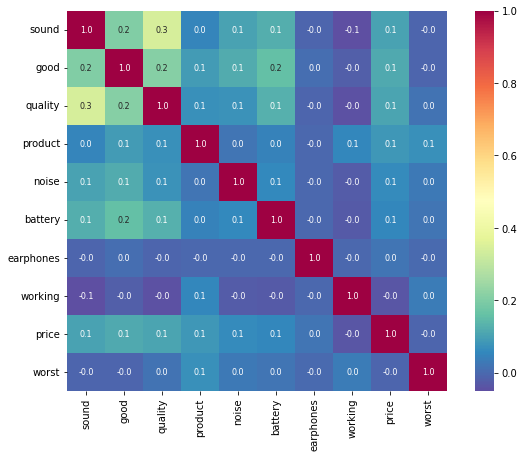

In [39]:
# Using heatMap to plot the correllation matrix between those words..
plt.figure(figsize  =(10,7))
sns.heatmap(data.corr(),cbar=True, square= True, fmt= '.1f',annot=True, annot_kws={'size':8},cmap='Spectral_r')

##### From the heatmap [sound, good and quality] shows a positive correllation with "product" This means 

##### the customers review concerning the keyword "product" in terms of [sound, good and quality] is okay.

##### Likewise [worst] also shows a positive correllation with product ... therefore some customer were also not 

##### satisfy with the product.

In [40]:
data.corr()['product'].sort_values(ascending=False)

product      1.000000
good         0.090034
price        0.083043
worst        0.071505
quality      0.070035
working      0.053934
sound        0.049761
battery      0.047261
noise        0.021595
earphones   -0.004918
Name: product, dtype: float64

### THE END

##### I will stop this analysis here and will continue the remaining analysis on R_programming where i'm going 

##### to plot a graphical representation of how each keyWords relate to the "customer products" and "customer 

##### reviews" whether it's ("positive","negative","neutral"). ThereFore the ramainder of these analysis will be 

##### continued using R_programming .... R_programming is also very good for data insight and analysis.

In [41]:
# Converting dataFrame to CSV
data[['Product','ReviewStar','Cleaned_Review']].to_csv('Cleaned_review_output.csv', index = False)